In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

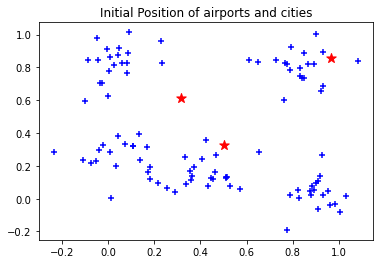

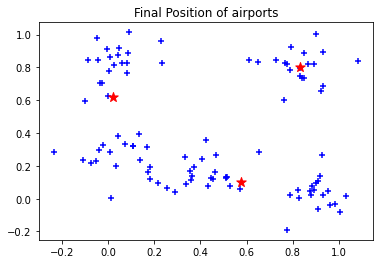

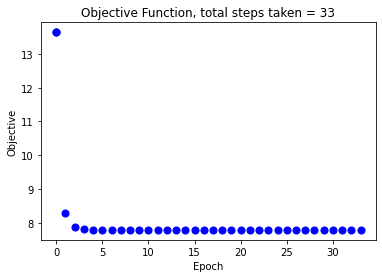

In [2]:
class Airport:
    def __init__(self, xCoord, yCoord):
        self.xCoord = xCoord
        self.yCoord = yCoord
        self.cities = [] #[city1, city2, ...] 
        self.sum = 0

    def getXCoord(self):
        return self.xCoord
    
    def getYCoord(self):
        return self.yCoord

    def setXCoord(self, newX):
        self.xCoord = newX
    
    def setYCoord(self, newY):
        self.yCoord = newY

    def getCoordSet(self):
        return (self.xCoord, self.yCoord)

    # takes in a city and updates the sum
    def setSum(self, city):
        self.sum += city.getDistanceToAirport()

    def getSum(self):
        return self.sum

"""
The city class holds its x and y values and also its distance from its
nearest airport
"""
class City:
    def __init__(self, cityX, cityY):
        self.cityX = cityX
        self.cityY = cityY

    def getCityX(self):
        return self.cityX
    
    def getCityY(self):
        return self.cityY

    def getCityCoord(self):
        return (self.cityX, self.cityY)

    def setDistanceToAirport(self, dist):
        self.dist = dist
    
    def getDistanceToAirport(self):
        return self.dist

# finds the airport closest to each city. Once it does, then assign each city to an airport 
# if they are already assigned, update the distance from each city to its airport
def closestAirports(cities, airports, airportsClasses):
    if len(airportsClasses) == 0: # when the airports dont have cities assigned to them
        allAirports = []
        i = 0

        # loop through each city and keep track of its location
        for city in cities:
            j = 0
            k = 0
            newCity = City(city[0], city[1]) # makes a city class per new city
            shortestDistance = 0

            # since the airports have not been initialized with their classes yet, initialize them on their
            # first iteration, also keep track of the shortest distance as we want the airport closest to the city
            for airport in airports:

                # makes the airport classes on their first iteration
                if i == 0:
                    newAirport = Airport(airport[0], airport[1])
                    allAirports.append(newAirport)
                
                # calculate distance to each airport
                currentDistance = pow((airport[0] - newCity.getCityX()), 2) + pow((airport[1] - newCity.getCityY()), 2)

                # update the shortest distance
                if j == 0:
                    shortestDistance = currentDistance
                elif currentDistance <= shortestDistance:
                    shortestDistance = currentDistance
                    k = j
                j += 1
            # after comparing the distance to each airport, save the city to the airport and update the cities distance
            newCity.setDistanceToAirport(shortestDistance)
            allAirports[k].cities.append(newCity)
            i += 1
        return allAirports

    else:

        # we just want to update the city distance in each airport
        for airport in airportsClasses:
            for city in airport.cities:
                currentDistance = pow((airport.getXCoord() - city.getCityX()), 2) + pow((airport.getYCoord() - city.getCityY()), 2)
                city.setDistanceToAirport(currentDistance)
        return airportsClasses

    
# the objective function that calculates the total sum for each airport
def objectiveFunction(cityAirports):
    for airport in cityAirports:
        airport.sum = 0

        # gets the total sum per airport by summing all distances calculated
        # when searching for each closest city
        for city in airport.cities:
          airport.setSum(city)

        
# the gradient function that calculates the slope for the x and y axis
def gradientFunction(cityAirports):

    alpha = .01
    for airport in cityAirports:
        partial = partialFunction(airport) # for each ariport get the distances for each city x and y coordinates and calculate where to go towards
        airport.setXCoord(airport.getXCoord() - (alpha * partial[0]))# sets the new location for the x axis for the airport (curr x - place needed to go)
        airport.setYCoord(airport.getYCoord() - (alpha * partial[1]))
        

# gets the partial sum for each city per airport
def partialFunction(airport):
    xSum = 0
    ySum = 0

    # calculates the total distance between each city and the current airport location
    # to see where it would be best to go
    for city in airport.cities:
        yDistance = (airport.getYCoord() - city.getCityY())
        xDistance = (airport.getXCoord() - city.getCityX())
        xSum += xDistance
        ySum += yDistance
    return (2 * xSum, 2 * ySum)


# gets the total sum to get the objective sum
def getObjectiveSum(cityAirports):
  objectiveSum = 0
  for airport in cityAirports:
    objectiveSum += airport.getSum()
  return objectiveSum


def main():
    num_city = 100
    num_air = 3
    num_center = 5
    sigma = 0.1
    cities = set()
    airports = []
    epoch = 0
    objectiveEpochs = []

    for i in range(num_center):
        x = random.random()
        y = random.random()
        xc = np.random.normal(x, sigma, num_city//num_center)
        yc = np.random.normal(y, sigma, num_city//num_center)
        cities = cities.union(zip(xc, yc))

    for i in range(num_air):
        x = random.random()
        y = random.random()
        airports.append((x,y)) 

    # first print out initial position of the cities
    zip_cities = zip(*cities)
    plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
    zip_airs = zip(*airports)
    plt.title("Initial Position of airports and cities")
    plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
    plt.show()
    plt.close()

    cityAirports = closestAirports(cities, airports, [])
    objectiveFunction(cityAirports)

    # Initialize the first data point
    objectiveEpochs.append((epoch, getObjectiveSum(cityAirports)))
    objectiveEpochs.append((epoch, getObjectiveSum(cityAirports)))
    hasntEntered = True

    while objectiveEpochs[len(objectiveEpochs) - 2][1] > objectiveEpochs[len(objectiveEpochs) - 1][1] or hasntEntered:
        hasntEntered = False
        epoch += 1

        # upon each new iteration, we want to initially upate the cities and airplanes variables as they might now be different
        # and we will also plot the points of these updated states if the next update has a greater objective function
        cities = []
        airports = []
        for i in range(len(cityAirports)):
            airportLoc = cityAirports[i].getCoordSet()
            airports.append(airportLoc)
            airportCities = cityAirports[i].cities

            for j in range(len(airportCities)):
                currCity = airportCities[j].getCityCoord()
                cities.append(currCity)

        # Move the airports closer to the cities
        gradientFunction(cityAirports)
        #again run the closestairports and the objective function to get the updated sums
        cityAirports = closestAirports(cities, airports, cityAirports)
        objectiveFunction(cityAirports)
        
        # Initialize second data point
        objectiveEpochs.append((epoch, getObjectiveSum(cityAirports)))

        # plot the final positions of the airports
        if objectiveEpochs[len(objectiveEpochs) - 2][1] <= objectiveEpochs[len(objectiveEpochs)- 1][1]:

            # first remake the 
            zip_cities = zip(*cities)
            plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
            zip_airs = zip(*airports)
            plt.title("Final Position of airports")
            plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
            plt.show()
            plt.close()

    objectiveEpochs.pop() # want to get rid of the last element as the last element is the epoch that increased
    zip_objectiveEpochs = zip(*objectiveEpochs)
    plt.scatter(*zip_objectiveEpochs, color='b', s=50)
    plt.xlabel("Epoch")
    plt.ylabel("Objective")
    plt.title("Objective Function, total steps taken = " + str(epoch - 1))
    plt.show()
    plt.close()
    
main()